# Kaggle - WiDS Datathon 2022

## Modelo mean

### Description:

- All the features
- Separation train/test - 80/20
- Catboost
- Hiperparameters by default
- Cross validation
- Long value of iterations: 10000

- Public Score = XXX

# 1. Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# 2. Data

In [2]:
#paths to model's results

modelo_5b = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/notebooks/modelos/modelo_5/modelo_5b.csv'
modelo_5c = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/notebooks/modelos/modelo_5/modelo_5c.csv'
modelo_6 = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/notebooks/modelos/modelo_6/modelo_6.csv'
modelo_interpretacion2 = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/notebooks/modelos/model_interpretation/modelo_interpretation_2.csv'
modelo_interpretacion1 = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/notebooks/modelos/model_interpretation/modelo_interpretation_1.csv'

In [3]:
df_modelo_5b = pd.read_csv(modelo_5b)
df_modelo_5c = pd.read_csv(modelo_5c)
df_modelo_6 = pd.read_csv(modelo_6)
df_modelo_interpretacion2 = pd.read_csv(modelo_interpretacion2)
df_modelo_interpretacion1 = pd.read_csv(modelo_interpretacion1)

In [4]:
submit_path = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/data/raw/sample_solution.csv'

In [5]:
#sumbit

submit = pd.read_csv(submit_path)
submit.head()

,id,site_eui
0,75757,0.0
1,75758,0.0
2,75759,0.0
3,75760,0.0
4,75761,0.0


In [6]:
models = [df_modelo_5b,df_modelo_5c,df_modelo_6,df_modelo_interpretacion1,df_modelo_interpretacion2]

In [7]:
site_eui_mean = (df_modelo_5b['site_eui'] + df_modelo_5c['site_eui'] + df_modelo_6['site_eui'] + df_modelo_interpretacion1['site_eui'] + df_modelo_interpretacion2['site_eui'])/len(models)
site_eui_mean

0       247.460643
1       226.063839
2       251.612063
3       254.889196
4       236.678025
           ...    
9700     42.942052
9701     44.946675
9702     45.619117
9703     52.010428
9704     30.319335
Name: site_eui, Length: 9705, dtype: float64

In [8]:
submit['site_eui'] = site_eui_mean
submit.to_csv('modelo_mean.csv',index=False)

## Analysis of site_eui predictions

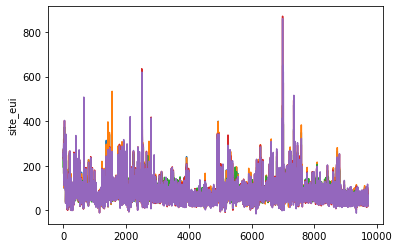

In [9]:
for model in models:
    sns.lineplot(data=model['site_eui'])

In [10]:
df_modelo_5b.describe()

,id,site_eui
count,9705.000000,9705.000000
mean,80609.000000,76.054953
std,2801.736515,42.486283
min,75757.000000,0.590642
25%,78183.000000,50.636030
50%,80609.000000,66.952104
75%,83035.000000,87.944268
max,85461.000000,491.970412


In [11]:
df_modelo_5c.describe()

,id,site_eui
count,9705.000000,9705.000000
mean,80609.000000,76.488023
std,2801.736515,43.193222
min,75757.000000,1.277666
25%,78183.000000,50.961709
50%,80609.000000,67.149624
75%,83035.000000,88.331390
max,85461.000000,533.698714


In [12]:
df_modelo_6.describe()

,id,site_eui
count,9705.000000,9705.000000
mean,80609.000000,72.771649
std,2801.736515,38.966106
min,75757.000000,5.568846
25%,78183.000000,46.913136
50%,80609.000000,65.332428
75%,83035.000000,87.713881
max,85461.000000,385.970946


In [13]:
df_modelo_interpretacion1.describe()

,id,site_eui
count,9705.000000,9705.000000
mean,80609.000000,75.307492
std,2801.736515,47.404875
min,75757.000000,-10.639904
25%,78183.000000,50.161319
50%,80609.000000,66.830438
75%,83035.000000,88.099130
max,85461.000000,870.643622


In [14]:
df_modelo_interpretacion2.describe()

,id,site_eui
count,9705.000000,9705.000000
mean,80609.000000,75.720042
std,2801.736515,47.982081
min,75757.000000,-16.312701
25%,78183.000000,49.781236
50%,80609.000000,67.632519
75%,83035.000000,89.017311
max,85461.000000,860.078520


interpretacion_1 and interpretacion_2 have values of site_eui below 0

## Modification of model "interpretacion1"

In [15]:
#filter for rows with site_eui below 0
filt = (df_modelo_interpretacion1['site_eui'] <= 0)

#filter values
values = df_modelo_interpretacion1[filt]['site_eui']

# replace values with 0
df_modelo_interpretacion1['site_eui'] = df_modelo_interpretacion1['site_eui'].replace([values],0)

#verification of changes
df_modelo_interpretacion1.describe()

,id,site_eui
count,9705.000000,9705.000000
mean,80609.000000,75.311855
std,2801.736515,47.397605
min,75757.000000,0.000000
25%,78183.000000,50.161319
50%,80609.000000,66.830438
75%,83035.000000,88.099130
max,85461.000000,870.643622


In [16]:
submit['site_eui'] = df_modelo_interpretacion1['site_eui']
submit.to_csv('modelo_interpretacion_corr.csv',index=False)

## Modification of model "interpretacion2"

In [17]:
#filter for rows with site_eui below 0
filt = (df_modelo_interpretacion2['site_eui'] <= 0)

#filter values
values = df_modelo_interpretacion2[filt]['site_eui']

# replace values with 0
df_modelo_interpretacion2['site_eui'] = df_modelo_interpretacion2['site_eui'].replace([values],0)

#verification of changes
df_modelo_interpretacion2.describe()

,id,site_eui
count,9705.000000,9705.000000
mean,80609.000000,75.727395
std,2801.736515,47.969699
min,75757.000000,0.000000
25%,78183.000000,49.781236
50%,80609.000000,67.632519
75%,83035.000000,89.017311
max,85461.000000,860.078520


In [18]:
submit['site_eui'] = df_modelo_interpretacion2['site_eui']
submit.to_csv('modelo_interpretacion2_corr.csv',index=False)

## New mean models

In [19]:
site_eui_mean = (df_modelo_5b['site_eui'] + df_modelo_5c['site_eui'] + df_modelo_6['site_eui'] + df_modelo_interpretacion1['site_eui'] + df_modelo_interpretacion2['site_eui'])/len(models)
site_eui_mean

0       247.460643
1       226.063839
2       251.612063
3       254.889196
4       236.678025
           ...    
9700     42.942052
9701     44.946675
9702     45.619117
9703     52.010428
9704     30.319335
Name: site_eui, Length: 9705, dtype: float64

In [20]:
submit['site_eui'] = site_eui_mean
submit.to_csv('modelo_mean.csv',index=False)